In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras


In [2]:
#load the data 
data = pd.read_csv('customer.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
data.drop(columns='customerID',axis=1,inplace=True)

In [8]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
pd.to_numeric(data.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
data[pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
data1 = data[data.TotalCharges != " "]
data1.shape

(7032, 20)

In [12]:
data1.TotalCharges = pd.to_numeric(data1.TotalCharges)

C:\Users\Pritam Dutta\AppData\Local\Temp\ipykernel_11908\3819501032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.TotalCharges = pd.to_numeric(data1.TotalCharges)


In [13]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


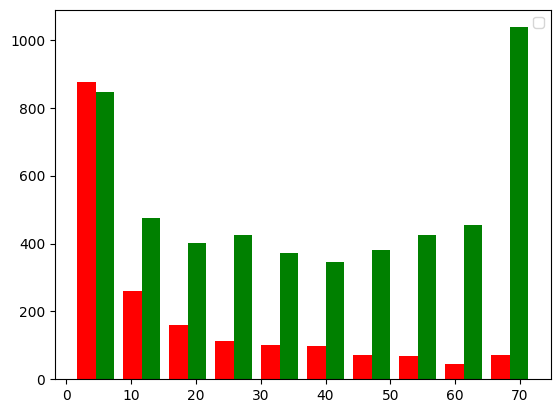

In [14]:
#data visualization 
data_churn_no = data1[data1.Churn =='No'].tenure
data_churn_yes = data1[data1.Churn =='Yes'].tenure
#histogram 
plt.hist([data_churn_yes,data_churn_no],color=['red','green'])
plt.legend()

In [15]:
def obje_col_val(data1):
    for column in data1:
        if data1[column].dtypes == 'object':
            print(f'{column} : {data1[column].unique()}')

In [16]:
obje_col_val(data1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
data1.replace('No phone service','No', inplace = True)
data1.replace('No internet service','No', inplace = True)

C:\Users\Pritam Dutta\AppData\Local\Temp\ipykernel_11908\687358674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No phone service','No', inplace = True)
C:\Users\Pritam Dutta\AppData\Local\Temp\ipykernel_11908\687358674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No internet service','No', inplace = True)


In [18]:
obje_col_val(data1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
             'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    data1[col].replace({'Yes':1,'No':0},inplace=True)
    

C:\Users\Pritam Dutta\AppData\Local\Temp\ipykernel_11908\4065544331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col].replace({'Yes':1,'No':0},inplace=True)


In [20]:
obje_col_val(data1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
for column in data1:
    print(f'{column} : {data1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [22]:
data1['gender'].replace({"Female":1,"Male":0},inplace=True)

C:\Users\Pritam Dutta\AppData\Local\Temp\ipykernel_11908\4030680907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['gender'].replace({"Female":1,"Male":0},inplace=True)


In [23]:
for column in data1:
    print(f'{column} : {data1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [24]:
#get dummies for the encoding 
data2 = pd.get_dummies(data1['InternetService'].str.get_dummies())
data1 = pd.concat([data1,data2],axis=1)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No
0,1,0,1,0,1,0,0,DSL,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,DSL,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,DSL,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,DSL,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


In [25]:
data3 = pd.get_dummies(data1['Contract'].str.get_dummies())
data1 = pd.concat([data1,data3],axis=1)
data1.head()




,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No,Month-to-month,One year,Two year
0,1,0,1,0,1,0,0,DSL,0,1,...,Electronic check,29.85,29.85,0,1,0,0,1,0,0
1,0,0,0,0,34,1,0,DSL,1,0,...,Mailed check,56.95,1889.50,0,1,0,0,0,1,0
2,0,0,0,0,2,1,0,DSL,1,1,...,Mailed check,53.85,108.15,1,1,0,0,1,0,0
3,0,0,0,0,45,0,0,DSL,1,0,...,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,1,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,Electronic check,70.70,151.65,1,0,1,0,1,0,0


In [26]:
data4 = pd.get_dummies(data1['PaymentMethod'].str.get_dummies())
data1 = pd.concat([data1,data4],axis=1)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,0,1,0,1,0,0,DSL,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,DSL,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,DSL,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,DSL,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'DSL', 'Fiber optic', 'No',
       'Month-to-month', 'One year', 'Two year', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check'],
      dtype='object')

In [28]:
data1.dtypes

gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
InternetService               object
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
Contract                      object
PaperlessBilling               int64
PaymentMethod                 object
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int64
DSL                            int64
Fiber optic                    int64
No                             int64
Month-to-month                 int64
One year                       int64
Two year                       int64
Bank transfer (automatic)      int64
C

In [29]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])

data1['tenure'].sample(3)

4185    0.000000
897     0.732394
3300    0.450704
Name: tenure, dtype: float64

In [31]:
data1.drop('InternetService',axis=1,inplace=True)
data1.drop('Contract',axis=1,inplace=True)
data1.drop('PaymentMethod',axis=1,inplace=True)


In [32]:
#splitting the data 
x = data1.drop('Churn',axis=1)
y = data1['Churn']


In [33]:
#train test_split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=5)

In [34]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()


In [35]:
x_train.shape

(5625, 26)

In [36]:
#neural networks 
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')   
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])


In [37]:
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
176/176 [==============================] - 2s 3ms/step - loss: 0.5700 - accuracy: 0.7314
Epoch 2/200
176/176 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.7934
Epoch 3/200
176/176 [==============================] - 1s 3ms/step - loss: 0.4220 - accuracy: 0.7996
Epoch 4/200
176/176 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8027
Epoch 5/200
176/176 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8043
Epoch 6/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4120 - accuracy: 0.8052
Epoch 7/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4114 - accuracy: 0.8076
Epoch 8/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.8075
Epoch 9/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4063 - accuracy: 0.8091
Epoch 10/200
176/176 [==============================] - 1s 4ms/step - loss: 0.4036 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.8484
Epoch 82/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8434
Epoch 83/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8500
Epoch 84/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8462
Epoch 85/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8469
Epoch 86/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8476
Epoch 87/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8484
Epoch 88/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3288 - accuracy: 0.8507
Epoch 89/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8519
Epoch 90/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 

176/176 [==============================] - 1s 4ms/step - loss: 0.2818 - accuracy: 0.8761
Epoch 161/200
176/176 [==============================] - 1s 4ms/step - loss: 0.2827 - accuracy: 0.8754
Epoch 162/200
176/176 [==============================] - 1s 3ms/step - loss: 0.2825 - accuracy: 0.8736
Epoch 163/200
176/176 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.8743
Epoch 164/200
176/176 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.8780
Epoch 165/200
176/176 [==============================] - 1s 4ms/step - loss: 0.2797 - accuracy: 0.8802
Epoch 166/200
176/176 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.8779
Epoch 167/200
176/176 [==============================] - 1s 3ms/step - loss: 0.2792 - accuracy: 0.8756
Epoch 168/200
176/176 [==============================] - 1s 3ms/step - loss: 0.2800 - accuracy: 0.8766
Epoch 169/200
176/176 [==============================] - 1s 3ms/step - loss: 0.2798 - a

In [38]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 2ms/step - loss: 0.7026 - accuracy: 0.7491


[0.7025517821311951, 0.7491115927696228]

In [39]:
y_predict = model.predict(x_test)
y_predict[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.00454238],
       [0.33246842],
       [0.00639457],
       [0.7001879 ],
       [0.4437912 ]], dtype=float32)

In [40]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [41]:
y_pred = []
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [43]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [46]:
from sklearn.metrics import classification_report

In [49]:
def ANN(x_train,y_train,x_test,y_test,loss):
    model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')   
    ])

    model.compile(
    optimizer='adam',
    loss=loss,
    metrics=['accuracy'])
    model.fit(x_train,y_train,epochs=50)
    print(model.evaluate(x_test,y_test))

    y_pred = model.predict(x_test)
    y_pred = np.round(y_pred)

    print("Classification Report : ",classification_report(y_test,y_pred))
    return y_pred
    

In [50]:
ANN(x_train,y_train,x_test,y_test,'binary_crossentropy')

Epoch 1/50
176/176 [==============================] - 2s 3ms/step - loss: 0.5075 - accuracy: 0.7356
Epoch 2/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.7963
Epoch 3/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.7998
Epoch 4/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4182 - accuracy: 0.8023
Epoch 5/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4115 - accuracy: 0.8094
Epoch 6/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4075 - accuracy: 0.8078
Epoch 7/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4055 - accuracy: 0.8112
Epoch 8/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4027 - accuracy: 0.8080
Epoch 9/50
176/176 [==============================] - 1s 4ms/step - loss: 0.3999 - accuracy: 0.8098
Epoch 10/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4005 - accuracy: 0.8117

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [51]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

In [52]:
count_class_0,count_class_1 = data1.Churn.value_counts()
df_class_0 = data1[data1['Churn']==0]
df_class_1 = data1[data1['Churn']==1]

In [53]:
df_class_0.shape

(5163, 27)

In [55]:
df_class_1.shape

(1869, 27)

In [63]:
#under sampling the dataset 
df_class_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_under,df_class_1])
df_test_under.shape

(3738, 27)

In [64]:
x = df_test_under.drop('Churn',axis=1)
y = df_test_under['Churn']


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=15)

In [68]:
x_test.shape

(748, 26)

In [69]:
ANN(x_train,y_train,x_test,y_test,'binary_crossentropy')

Epoch 1/50
94/94 [==============================] - 2s 5ms/step - loss: 0.6190 - accuracy: 0.6666
Epoch 2/50
94/94 [==============================] - 0s 5ms/step - loss: 0.5153 - accuracy: 0.7438
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7502
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.7518
Epoch 5/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7592
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.7622
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.7615
Epoch 8/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4820 - accuracy: 0.7645
Epoch 9/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4794 - accuracy: 0.7669
Epoch 10/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7669
Epoch 11/50
94/94 [

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

# Method 2 : oversampling 

In [77]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(5163, 27)

In [79]:
df_test_over = pd.concat([df_class_0,df_class_1_over])
df_test_over.shape

(10326, 27)

In [82]:
x = df_test_over.drop('Churn',axis=1)
y = df_test_over['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=15)


x_train.shape


(8260, 26)

In [83]:
ANN(x_train,y_train,x_test,y_test,'binary_crossentropy')

Epoch 1/50
259/259 [==============================] - 2s 3ms/step - loss: 0.5642 - accuracy: 0.7225
Epoch 2/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4917 - accuracy: 0.7644
Epoch 3/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4817 - accuracy: 0.7711
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4754 - accuracy: 0.7726
Epoch 5/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4703 - accuracy: 0.7798
Epoch 6/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4648 - accuracy: 0.7771
Epoch 7/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.7841
Epoch 8/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.7827
Epoch 9/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4546 - accuracy: 0.7883
Epoch 10/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.7902

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

# method3 : SMOTE

In [84]:
x = df_test_over.drop('Churn',axis=1)
y = df_test_over['Churn']

In [85]:
from imblearn import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit(x,y)

ImportError: cannot import name 'SMOTE' from 'imblearn' (C:\Users\Pritam Dutta\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\__init__.py)